In [35]:
import pandas as pd
import acbm

import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data 

In [82]:
# NTS data 
legs_nts = pd.read_parquet(
    acbm.root_path / "data/external/nts/filtered/nts_trips.parquet"
)

legs_nts = legs_nts[legs_nts["TravDay"] == 3]

# Model outputs 
legs_acbm = pd.read_csv(
    acbm.root_path / "data/processed/activities_pam/legs.csv"
)
legs_acbm_geo = pd.read_parquet(
    acbm.root_path / "data/processed/activities_pam/legs_with_locations.parquet"
)



In [9]:
legs_acbm


,Unnamed: 0,pid,hid,freq,ozone,dzone,purp,origin activity,destination activity,mode,seq,tst,tet,duration
0,0,199,89,NaN,E00059031,E00058720,other,home,other,walk,1.0,1900-01-01 10:00:00,1900-01-01 10:45:00,0:45:00
1,1,199,89,NaN,E00058720,E00059031,home,other,home,walk,2.0,1900-01-01 10:45:00,1900-01-01 11:30:00,0:45:00
2,2,199,89,NaN,E00059031,E00057312,shop,home,shop,car,3.0,1900-01-01 12:00:00,1900-01-01 12:10:00,0:10:00
3,3,199,89,NaN,E00057312,E00059031,home,shop,home,car,4.0,1900-01-01 12:45:00,1900-01-01 12:55:00,0:10:00
4,4,199,89,NaN,E00059031,E00058564,work,home,work,car,5.0,1900-01-01 13:30:00,1900-01-01 13:50:00,0:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970,14970,794026,334502,NaN,E00056891,E00057826,home,escort,home,car,4.0,1900-01-01 20:45:00,1900-01-01 21:05:00,0:20:00
14971,14971,794027,334502,NaN,E00057826,E00057536,escort,home,escort,car,1.0,1900-01-01 07:40:00,1900-01-01 07:55:00,0:15:00
14972,14972,794027,334502,NaN,E00057536,E00057826,home,escort,home,pt,2.0,1900-01-01 15:00:00,1900-01-01 15:55:00,0:55:00
14973,14973,794027,334502,NaN,E00057826,E00056882,other,home,other,pt,3.0,1900-01-01 18:35:00,1900-01-01 19:35:00,1:00:00


In [83]:
# rename origin activity and destination activity columns

legs_acbm = legs_acbm.rename(columns={"origin activity": "oact", "destination activity": "dact"})

In [30]:
legs_nts

,TripID,DayID,IndividualID,HouseholdID,PSUID,PersNo,TravDay,seq,ShortWalkTrip_B01ID,NumStages,...,tst,tet,TripDisIncSW,TripDisExSW,TripTotalTime,TripTravTime,ozone,dzone,W5,W5xHH
4659590,2019010628,2019004945,2019000771,2019000319,2019000035,1,3,3,2,1,...,795.0,810.0,6.1,6.1,15,15.0,8,8.0,0.997967,1.227954
4659597,2019010396,2019004812,2019000748,2019000308,2019000033,2,3,1,2,1,...,505.0,525.0,3.5,3.5,20,20.0,2,2.0,0.872082,1.067045
4659609,2019010979,2019005120,2019000798,2019000329,2019000036,2,3,1,2,3,...,445.0,556.0,52.3,52.3,111,101.0,8,7.0,1.097494,1.007174
4659616,2019010994,2019005127,2019000799,2019000330,2019000036,1,3,1,2,1,...,720.0,750.0,18.0,18.0,30,30.0,8,8.0,0.784036,1.000000
4659617,2019010996,2019005127,2019000799,2019000330,2019000036,1,3,3,2,1,...,985.0,1041.0,17.1,17.1,56,56.0,8,8.0,0.784036,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150053,2022111153,2022059517,2022009859,2022004366,2022000756,3,3,6,2,1,...,1020.0,1035.0,5.0,5.0,15,15.0,9,9.0,0.912527,1.000000
5150079,2022111179,2022059524,2022009860,2022004366,2022000756,4,3,1,2,1,...,480.0,525.0,12.0,12.0,45,45.0,9,8.0,0.912527,1.000000
5150080,2022111180,2022059524,2022009860,2022004366,2022000756,4,3,2,2,2,...,965.0,1035.0,19.0,19.0,70,60.0,8,9.0,0.912527,1.000000
5150098,2022111198,2022059531,2022009864,2022004368,2022000756,1,3,1,2,1,...,645.0,660.0,7.0,7.0,15,15.0,9,9.0,1.621441,1.152563


In [31]:

legs_nts[
    [
        "seq",
        "ozone",
        "dzone",
        "oact",
        "dact",
        "mode",
        "tst",
        "tet",
    ]
]

,seq,ozone,dzone,oact,dact,mode,tst,tet
4659590,3,8,8.0,shop,home,car,795.0,810.0
4659597,1,2,2.0,home,medical,car,505.0,525.0
4659609,1,8,7.0,home,work,pt,445.0,556.0
4659616,1,8,8.0,home,other,car,720.0,750.0
4659617,3,8,8.0,visit,home,car,985.0,1041.0
...,...,...,...,...,...,...,...,...
5150053,6,9,9.0,escort,home,car,1020.0,1035.0
5150079,1,9,8.0,home,education,car,480.0,525.0
5150080,2,8,9.0,education,home,car,965.0,1035.0
5150098,1,9,9.0,home,shop,car,645.0,660.0


# Compare distributions between NTS and output

# Matching 

## Matching: Trip Purpose 

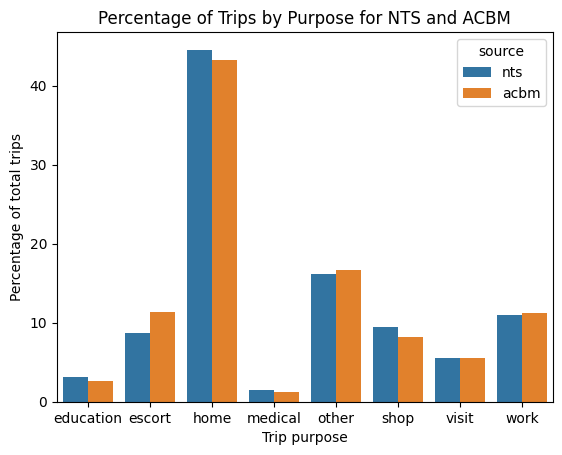

In [84]:
# Get number of trips by mode for legs_nts, and legs_acbm, and plot a comparative bar plot

# NTS
purpose_nts = legs_nts.groupby("dact").size().reset_index(name="count")
purpose_nts["source"] = "nts"

# ACBM
purpose_acbm = legs_acbm.groupby("dact").size().reset_index(name="count")
purpose_acbm["source"] = "acbm"

# Combine the data
purpose_compare = pd.concat([purpose_nts, purpose_acbm])

# Calculate the percentage of trips for each mode within each source
purpose_compare["percentage"] = purpose_compare.groupby("source")["count"].transform(lambda x: (x / x.sum()) * 100)


sns.barplot(data=purpose_compare, x="dact", y="percentage", hue="source")
plt.xlabel('Trip purpose')
plt.ylabel('Percentage of total trips')
plt.title('Percentage of Trips by Purpose for NTS and ACBM')
plt.show()

In [85]:
purpose_compare

,dact,count,source,percentage
0,education,1823,nts,3.071143
1,escort,5180,nts,8.726562
2,home,26434,nts,44.532421
3,medical,859,nts,1.447127
4,other,9628,nts,16.219950
5,shop,5621,nts,9.469499
6,visit,3313,nts,5.581293
7,work,6501,nts,10.952004
0,education,389,acbm,2.597663
1,escort,1708,acbm,11.405676


## Matching: Trip Mode 



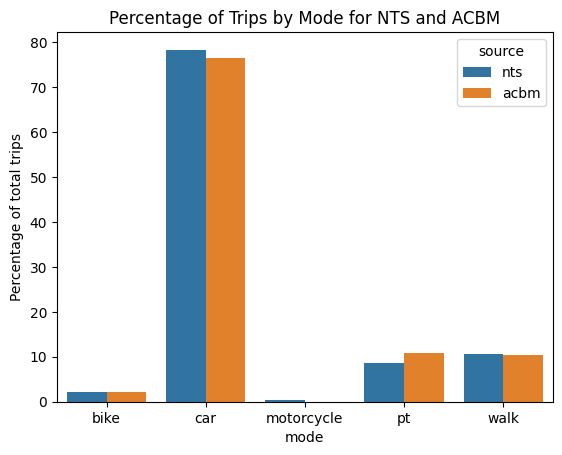

In [86]:
# Get number of trips by mode for legs_nts, and legs_acbm, and plot a comparative bar plot

# NTS
modeshare_nts = legs_nts.groupby("mode").size().reset_index(name="count")
modeshare_nts["source"] = "nts"

# ACBM
modeshare_acbm = legs_acbm.groupby("mode").size().reset_index(name="count")
modeshare_acbm["source"] = "acbm"

# Combine the data
modeshare_compare = pd.concat([modeshare_nts, modeshare_acbm])

# Calculate the percentage of trips for each mode within each source
modeshare_compare["percentage"] = modeshare_compare.groupby("source")["count"].transform(lambda x: (x / x.sum()) * 100)


sns.barplot(data=modeshare_compare, x="mode", y="percentage", hue="source")
plt.ylabel('Percentage of total trips')
plt.title('Percentage of Trips by Mode for NTS and ACBM')
plt.show()

## Matching: Time of Day 

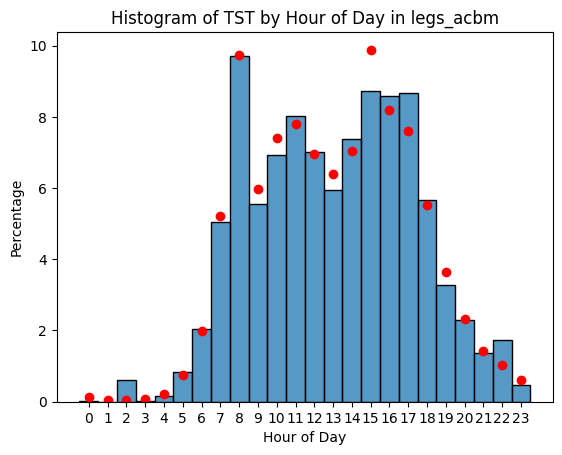

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new DataFrame
legs_acbm_clean = legs_acbm.copy()

# Convert tst to datetime format
legs_acbm_clean['tst'] = pd.to_datetime(legs_acbm_clean['tst'])

# Extract the hour component
legs_acbm_clean['hour'] = legs_acbm_clean['tst'].dt.hour #+ 1

# Calculate the percentage of each hour in legs_acbm_clean['hour']
acbm_hour_counts = legs_acbm_clean['hour'].value_counts(normalize=True).sort_index() * 100

# Convert legs_nts["tst"] from minutes to hours
legs_nts['hour'] = legs_nts['tst'] // 60

# Calculate the percentage of each hour in legs_nts['hour']
nts_hour_counts = legs_nts['hour'].value_counts(normalize=True).sort_index() * 100

# Plot the histogram using seaborn
sns.histplot(legs_acbm_clean['hour'], bins=24, kde=False, discrete=True, stat='percent')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage')
plt.title('Histogram of TST by Hour of Day in legs_acbm')
plt.xticks(range(0, 24))  # Set x-ticks to represent each hour of the day

# Add dots to represent the percentage values of legs_nts["tst"]
for hour, percent in nts_hour_counts.items():
    plt.plot(hour, percent, 'ro')  # 'ro' means red dot

plt.show()

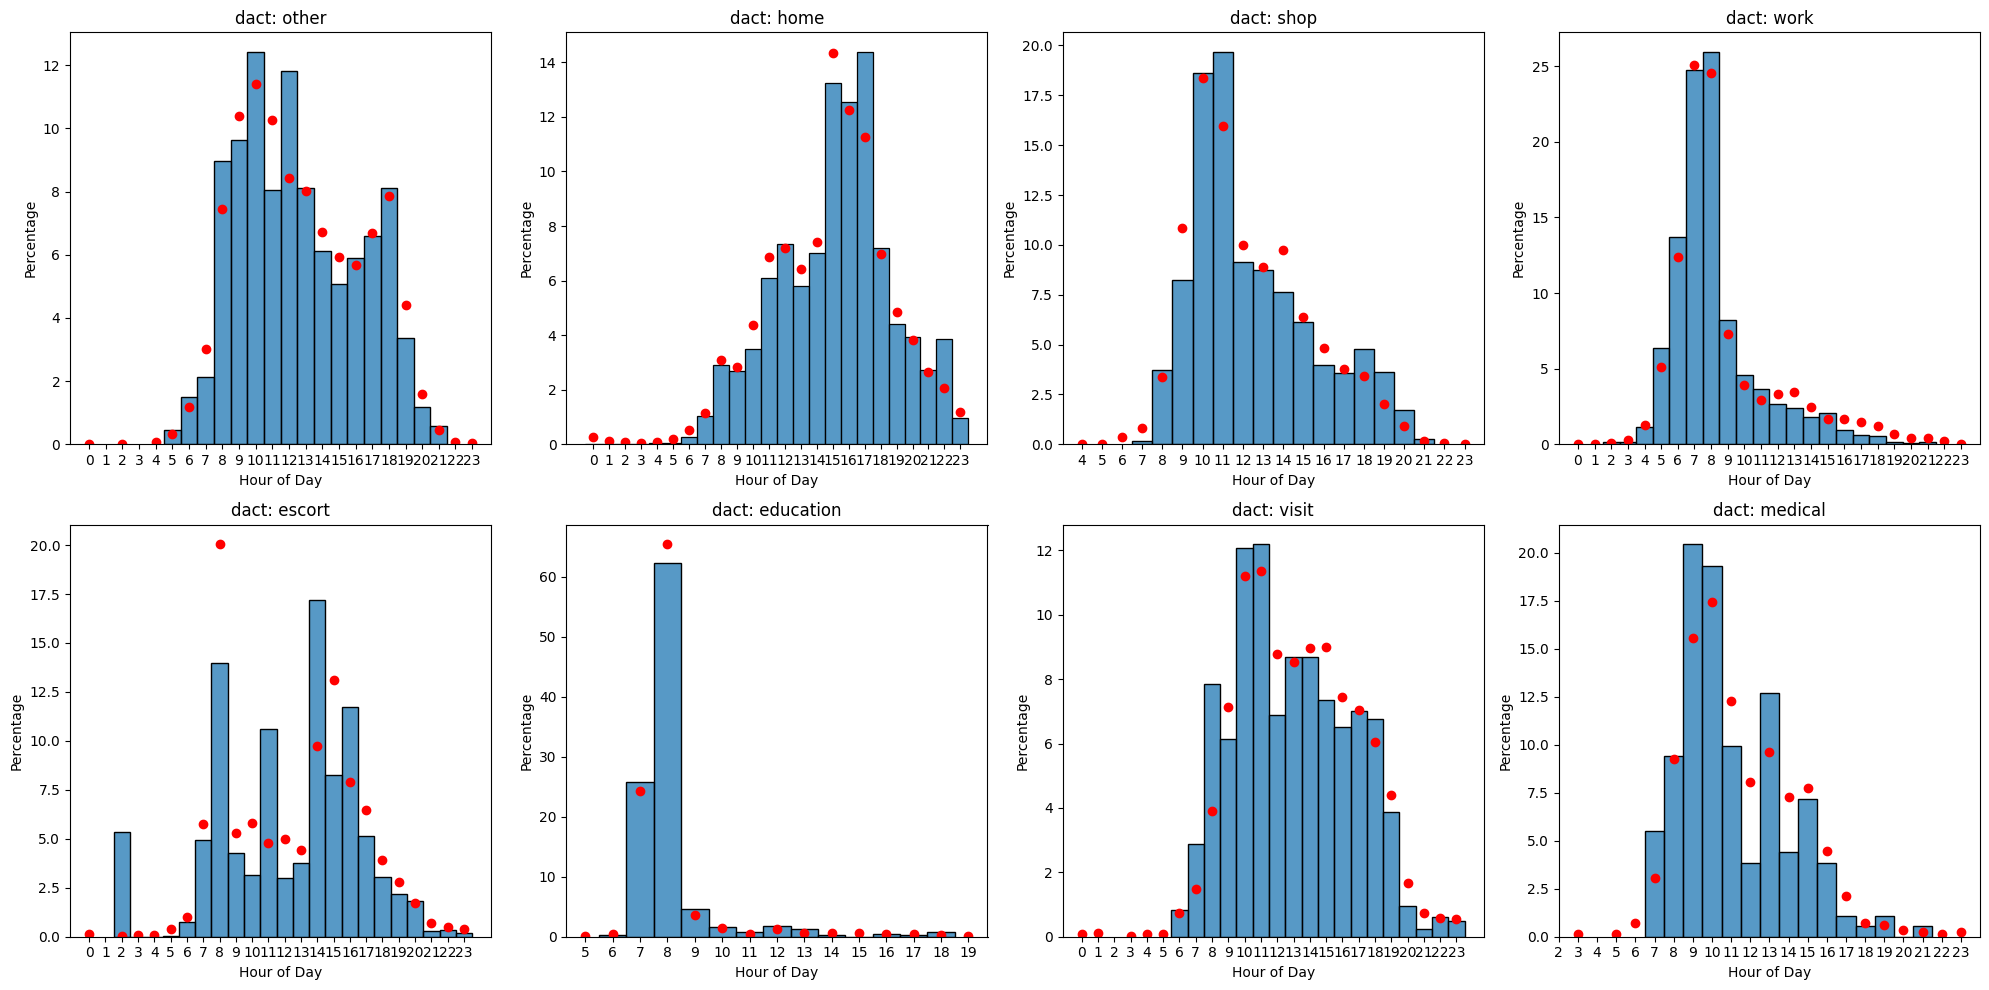

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new DataFrame
legs_acbm_clean = legs_acbm.copy()

# Convert tst to datetime format
legs_acbm_clean['tst'] = pd.to_datetime(legs_acbm_clean['tst'])

# Extract the hour component
legs_acbm_clean['hour'] = legs_acbm_clean['tst'].dt.hour

# Convert legs_nts["tst"] from minutes to hours
legs_nts['hour'] = legs_nts['tst'] // 60

# Get unique dact values
unique_dact_values = legs_acbm_clean['dact'].unique()

# Create a figure with subplots
num_plots = len(unique_dact_values)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5), sharey=False)
axes = axes.flatten()

# Iterate over unique dact values and create plots
for i, dact_value in enumerate(unique_dact_values):
    ax = axes[i]
    acbm_data = legs_acbm_clean[legs_acbm_clean['dact'] == dact_value]
    nts_data = legs_nts[legs_nts['dact'] == dact_value]

    # Plot histogram for acbm_data
    sns.histplot(acbm_data['hour'], bins=24, kde=False, discrete=True, stat='percent', ax=ax)
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Percentage')
    ax.set_xticks(range(0, 24))  # Set x-ticks to represent each hour of the day
    ax.set_title(f'dact: {dact_value}')
    
    # Add dots to represent the percentage values of legs_nts["hour"]
    nts_hour_counts = nts_data['hour'].value_counts(normalize=True).sort_index() * 100
    for hour, percent in nts_hour_counts.items():
        ax.plot(hour, percent, 'ro')  # 'ro' means red dot

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [55]:
# get the column type of tst

legs_acbm['tst'].dtype

dtype('O')

## Matching: Activity Sequences

Abbreviate values

In [73]:
# Abbreviate the column values 

# Mapping dictionary
activity_mapping = {
    'home': 'h',
    'other': 'o',
    'escort': 'e',
    'work': 'w',
    'shop': 'sh',
    'visit': 'v',
    'education': 'edu',
    'medical': 'm'
}

# Replace values in 'origin activity' and 'destination activity' columns
legs_acbm['origin activity'] = legs_acbm['origin activity'].replace(activity_mapping)
legs_acbm['destination activity'] = legs_acbm['destination activity'].replace(activity_mapping)

# Replace values in 'oact' and 'dact' columns

legs_nts['oact'] = legs_nts['oact'].replace(activity_mapping)
legs_nts['dact'] = legs_nts['dact'].replace(activity_mapping)


Create chains from data and count number of observations of each chain

In [74]:
import pandas as pd
from pandas import DataFrame

def process_sequences(df: DataFrame, 
                      pid_col: str, 
                      seq_col: str, 
                      origin_activity_col: str, 
                      destination_activity_col: str,
                      suffix: str) -> DataFrame:
    """
    Processes a DataFrame to generate activity sequences and counts the number of occurrences of each sequence.


    Parameters
    ----------
    df: pd.DataFrame
        The input DataFrame containing the data.
    pid_col: str
        The name of the column representing the unique identifier for each group.
    seq_col: str
        The name of the column representing the sequence order within each group.
    origin_activity_col: str
        The name of the column representing the origin activity.
    destination_activity_col: str
        The name of the column representing the destination activity.
    suffix: str
        The suffix to be added to the count column name.

    Returns
    -------
    pd.DataFrame
        A DataFrame with the activity sequences and their counts.
        
        activity_sequence           count_{suffix}
        ----------------------      --------------
        home - work - visit - home              5
        home - school - home                    3
        home - work - home                     20
    """
    # Step 1: Sort the DataFrame by 'pid' and 'seq'
    sorted_df = df.sort_values(by=[pid_col, seq_col])
    
    # Step 2: Group by 'pid' and concatenate 'origin activity' values followed by the last 'destination activity' value
    activity_sequence_df = sorted_df.groupby(pid_col).apply(
        lambda x: ' - '.join(x[origin_activity_col].tolist() + [x[destination_activity_col].iloc[-1]])
    ).reset_index()
    
    # Rename the columns for clarity
    activity_sequence_df.columns = [pid_col, 'activity_sequence']
    
    # Step 3: Group by the resulting 'activity_sequence' column and count the number of values in each group
    result = activity_sequence_df.groupby('activity_sequence').size().reset_index(name=f'count_{suffix}')    
    return result

In [75]:
sequence_nts = process_sequences(df = legs_nts, 
                                 pid_col = 'IndividualID', 
                                 seq_col = 'seq', 
                                 origin_activity_col = 'oact', 
                                 destination_activity_col = 'dact',
                                 suffix = 'nts')

sequence_nts

/tmp/ipykernel_652845/491085427.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  activity_sequence_df = sorted_df.groupby(pid_col).apply(


,activity_sequence,count_nts
0,e - e - e - h - e - e - v - v - h - e - h,1
1,e - e - e - h - o - h,1
2,e - e - h,1
3,e - h,10
4,e - h - e,3
...,...,...
1818,w - w - w - h - o - h - o - h,1
1819,w - w - w - h - w - w - h - w - h,1
1820,w - w - w - s - w,1
1821,w - w - w - w - h - h - h - w,1


In [76]:
sequence_acbm = process_sequences(df = legs_acbm,
                                  pid_col = 'pid', 
                                  seq_col = 'seq', 
                                  origin_activity_col = 'origin activity', 
                                  destination_activity_col = 'destination activity', 
                                  suffix = 'acbm')

sequence_acbm
                                  

/tmp/ipykernel_652845/491085427.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  activity_sequence_df = sorted_df.groupby(pid_col).apply(


,activity_sequence,count_acbm
0,h - e,5
1,h - e - e - e - h,91
2,h - e - e - e - h - o - h,6
3,h - e - e - e - h - s - h,1
4,h - e - e - h,8
...,...,...
452,h - w - w - w - h - o - h,1
453,h - w - w - w - h - o - h - o - h,2
454,h - w - w - w - h - o - o - o - h,1
455,h - w - w - w - w - h,1


Plot the comparison

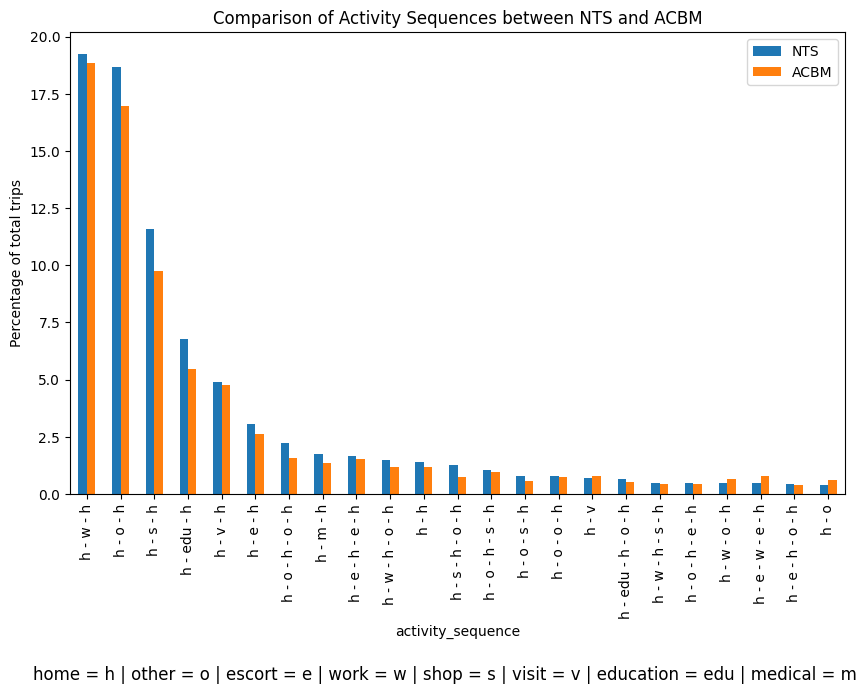

In [87]:
# join the two dataframes by 'activity_sequence'
sequence_nts_acbm = sequence_nts.merge(sequence_acbm, on='activity_sequence', how='inner').sort_values(by='count_nts', ascending=False)
sequence_nts_acbm

# Get % contribution of each unique activity sequence
sequence_nts_acbm['count_nts'] = sequence_nts_acbm['count_nts'] / sequence_nts_acbm['count_nts'].sum() * 100
sequence_nts_acbm['count_acbm'] = sequence_nts_acbm['count_acbm'] / sequence_nts_acbm['count_acbm'].sum() * 100

# Filter rows where both count columns are bigger than x %
x = 0.35

sequence_nts_acbm_filtered = sequence_nts_acbm[
    (sequence_nts_acbm['count_nts'] > x) & (sequence_nts_acbm['count_acbm'] > x)
]

# Plot the results as a bar chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sequence_nts_acbm_filtered.plot(
    x='activity_sequence', 
    y=['count_nts', 'count_acbm'], 
    kind='bar', 
    ax=ax
)

plt.ylabel('Percentage of total trips')

plt.title('Comparison of Activity Sequences between NTS and ACBM')


# Generate custom legend
legend_labels = [f'{abbr} = {full}' for abbr, full in activity_mapping.items()]
custom_legend = ' | '.join(legend_labels)

# Add the custom legend to the plot
plt.legend(['NTS', 'ACBM'], loc='upper right')

# Add the custom legend below the chart
plt.figtext(0.5, -0.2, custom_legend, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()


## Assigning: Trip distances

### Mean crowfly distance per trip purpose

### Crowfly distance cumulative chart (KM distance vs. % of trips)